# NLP for NOOBS Example Notebook

## NLP Basics

### Example 1: Tokenization

In [1]:
sample_text = """A token is a sequence of characters in a document that are useful for
                 an analytical purpose. Often, but not always individual words. A 
                 document in an NLP context simply means a collection of text, this
                 could be a tweet, a book, or anything in between. 
                 Attributes of good tokens 
                 Tokens should always be stored in an iterable data structure 
                 (list, generator, etc.) to allow for easy future analysis 
                 Tokens should all be the same case to reduce complexity 
                 Tokens should be free of non-alphanumeric characters"""

In [2]:
import re

def tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ^0-9]', '', str(text))
    return text.split()
  
tokens = tokenize(sample_text)
tokens[:10]

['a',
 'token',
 'is',
 'a',
 'sequence',
 'of',
 'characters',
 'in',
 'a',
 'document']

### Example 2: Word Count

In [3]:
from collections import Counter

def word_counter(tokens):
    word_counts = Counter()
    word_counts.update(tokens)
    return word_counts
  
word_count = word_counter(tokens)
word_count.most_common(5)

[('a', 7), ('of', 4), ('in', 4), ('be', 4), ('tokens', 4)]

### Example 3: Word Count Visualization

In [4]:
import matplotlib.pyplot as plt

x = list(word_count.keys())[:10]
y = list(word_count.values())[:10]

plt.bar(x, y)
plt.show();

<Figure size 640x480 with 1 Axes>

### Example 4: Document Makeup DataFrame

In [5]:
import pandas as pd

def count(docs):
  
    word_counts = Counter()
    appears_in = Counter()
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = list(zip(word_counts.keys(), word_counts.values()))
    
    # Word and count columns
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    # Rank column
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    # Percent Total column
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    # Cumulative percent total column
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    # Appears in column
    t2 = list(zip(appears_in.keys(), appears_in.values()))
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    # Appears in percent column
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    
    return wc.sort_values(by='rank')
  
wc = count([tokens])

wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
54,a,1,7,1.0,0.081395,0.081395,1.0
0,of,1,4,2.0,0.046512,0.127907,1.0
11,in,1,4,3.0,0.046512,0.174419,1.0
52,be,1,4,4.0,0.046512,0.220930,1.0
38,tokens,1,4,5.0,0.046512,0.267442,1.0


### Example 5: Cumulative Distribution Plot

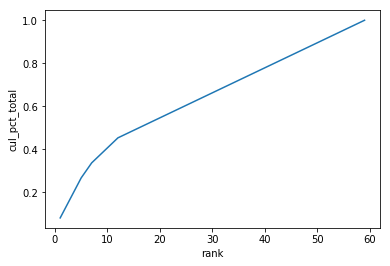

In [6]:
import seaborn as sns

sns.lineplot(x = 'rank', y = 'cul_pct_total', data = wc)
plt.show();

### Example 6: Tree Plot

In [7]:
!pip install squarify

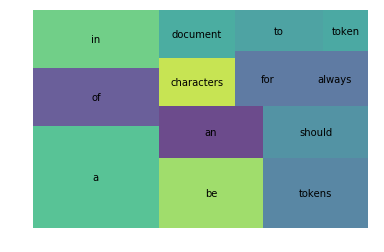

In [8]:
import squarify

wc_top20 = wc[wc['rank'] <= 13]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show();

### Example 7: Tokens with SpaCy

In [17]:
import spacy 

nlp = spacy.load("en_core_web_lg")

def spacy_tokenize(text):
    doc = nlp.tokenizer(text)
    return [token.text for token in doc]

spacy_tokens = spacy_tokenize(sample_text)

spacy_tokens[:10]

['A',
 'token',
 'is',
 'a',
 'sequence',
 'of',
 'characters',
 'in',
 'a',
 'document']

### Example 8: Stopword Removal

In [21]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

def remove_stopwords(tokens):
    cleaned_tokens = []
    
    for token in tokens:
        if token not in spacy_stopwords:
            cleaned_tokens.append(token)
    
    return cleaned_tokens


cleaned_tokens = remove_stopwords(spacy_tokens)

cleaned_tokens[:10]

['A',
 'token',
 'sequence',
 'characters',
 'document',
 'useful',
 'analytical',
 'purpose',
 '.',
 'Often']

### Example 9: Lemmatization

In [19]:
def spacy_lemmatize(text):
    doc = nlp.tokenizer(text)
    return [token.lemma_ for token in doc]

spacy_lemmas = spacy_lemmatize(sample_text)

spacy_lemmas[:10]

['A', 'token', 'be', 'a', 'sequence', 'of', 'character', 'in', 'a', 'document']



---

